## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In this jupyter notebook we will be looking at data from the King's County House Sales dataset.  The goal of this project is to make recommendations to a real estate business as to which houses will create a larger profit for them.  In doing so I will be looking at 3 main factors.  The first factor I will explore will be location.  The location of a house for sale could possibly change the price of a house due to things like nice views, good schools, entertainment close by, and other various factors. While the dataset does not include these specifics, if houses on one area tend to be higher in price than another we can assume that this area is more desirable.  The second factor I will be looking at will be the size of a house.  A larger house could effect the overall price of the home, and I will also be looking to see if at any point a house is "too big" to see if this effects price aswell.  For the third factor, I will be looking to see if renovations increase or decrease the overall price of a house. If any of these 3 factors are more influential to the overall sale price of a house, that will be noted aswell.

1.) Location of house based on latitude and longitude vs price
2.) square footage, bedrooms, and bathrooms vs price
3.) Are renovations worth doing in terms of sale price? 

In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.patches as mpatches
from sklearn import linear_model
import statsmodels.api as sm
import matplotlib.ticker as ticker
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

### Importing data

In [209]:
#import csv file Kings County House Sales dataset
kc_house_data = pd.read_csv(r'data\kc_house_data.csv')

In [210]:
#removing alphabetical characters from column "grade"
kc_house_data['grade'] = kc_house_data['grade'].str.replace('[a,A,b,B,c,C,d,D,e,E,f,F,g,G,h,H,i,I,j,J,k,K,l,L,m,M,n,N,o,O,p,P,q,Q,r,R,s,S,t,T,u,U,v,V,w,W,x,X,y,Y,z,Z]','')

In [211]:
#changing datatype of column "grade"
kc_house_data['grade'] = kc_house_data['grade'].astype(int)

In [212]:
#checking datatypes of columns
kc_house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  int32  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

### Clean up and removal of unwanted columns

## 'view' clean up

In [213]:
#removing 'NONE' value and replacing it with 0 for false in the 'view' column
kc_house_data['view'].replace('NONE', 0, inplace=True)
kc_house_data['view'].replace('NaN', 0, inplace=True)
kc_house_data['view'].replace('YES', 1, inplace=True)
kc_house_data['view'].replace('AVERAGE', 1, inplace=True)
kc_house_data['view'].replace('FAIR', 2, inplace=True)
kc_house_data['view'].replace('GOOD', 3, inplace=True)
kc_house_data['view'].replace('EXCELLENT', 4, inplace=True)
#replacing nan values with 0
kc_house_data['view'] = kc_house_data['view'].fillna(0)
#change view datatype
#kc_house_data['view'].astype(int)

In [214]:
#confirming all values are numerical in column view
kc_house_data.view.unique()

array([0., 3., 4., 1., 2.])

## 'waterfront' clean up

In [215]:
#checking for unique values in the waterfront column.
kc_house_data.waterfront.unique()

array([nan, 'NO', 'YES'], dtype=object)

In [216]:
# replacing all nan values with 0
kc_house_data['waterfront'] = kc_house_data['waterfront'].fillna(0)
#replacing all 'NO' values with 0
kc_house_data['waterfront'].replace('NO', 0, inplace=True)
#replacing all 'YES' values with 1
kc_house_data['waterfront'].replace('YES', 1, inplace=True)

In [217]:
#confirming change from dtype str to int
kc_house_data.waterfront.unique()

array([0, 1], dtype=int64)

In [218]:
#checking all datatypes, need to make them all numerical
kc_house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  float64
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  int32  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

### exploratory analysis for price based on zipcode

viewing values that are empty in the column of price

In [219]:
# Checking for empty values of price
kc_house_data[kc_house_data['price'] == 'NaN']

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


No values are 'NaN' in the price column

In [220]:
## Checking for empty values of price
kc_house_data[kc_house_data['price'] == '']

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


No values are empty in the price column

 1.) location.  The plan here is to groupby zipcode.  Then find the average price of each house in each zipcode. Next I will plot each zipcode with its corresponding average price.  This should give me a good insight into which zipcodes have houses that on average sell for more than houses in other zipcodes.

In [221]:
#groupby based on location(zipcode)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
location_group = kc_house_data.groupby('zipcode').mean()

In [222]:
#resetting index so zipcode is first column, not the index.
location_group = location_group.rename_axis('Zipcode').reset_index()

In [223]:
#sorting price by descending
kc_house_data.sort_values(by = 'grade', ascending = False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
9245,9208900037,9/19/2014,6890000.00,6,7.75,9890,31374,2.00,0,4.00,...,13,8860,1030.0,2001,0.00,98039,47.63,-122.24,4540,42730
6035,1725059316,11/20/2014,2390000.00,4,4.00,6330,13296,2.00,0,1.00,...,13,4900,1430.0,2000,0.00,98033,47.65,-122.20,2200,9196
13398,2426039123,1/30/2015,2420000.00,5,4.75,7880,24250,2.00,0,1.00,...,13,7880,0.0,1996,0.00,98177,47.73,-122.36,2740,10761
4407,2470100110,8/4/2014,5570000.00,5,5.75,9200,35069,2.00,0,0.00,...,13,6200,3000.0,2001,nan,98039,47.63,-122.23,3560,24345
10362,3303850390,12/12/2014,2980000.00,5,5.50,7400,18898,2.00,0,3.00,...,13,6290,1110.0,2001,0.00,98006,47.54,-122.11,6110,26442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7966,3122069029,6/19/2014,120000.00,2,1.00,990,39964,1.00,0,0.00,...,4,990,0.0,1945,0.00,98042,47.36,-122.08,1560,8990
1065,3340401535,11/5/2014,140000.00,1,1.00,730,6890,1.00,0,0.00,...,4,730,0.0,1926,0.00,98055,47.47,-122.22,1790,7969
16516,2114700500,4/18/2015,90000.00,1,1.00,560,4120,1.00,0,0.00,...,4,560,0.0,1947,0.00,98106,47.53,-122.35,980,4120
12063,8655900162,2/19/2015,156000.00,1,0.75,470,15000,1.00,0,0.00,...,4,470,0.0,1947,0.00,98014,47.66,-121.91,1730,22500


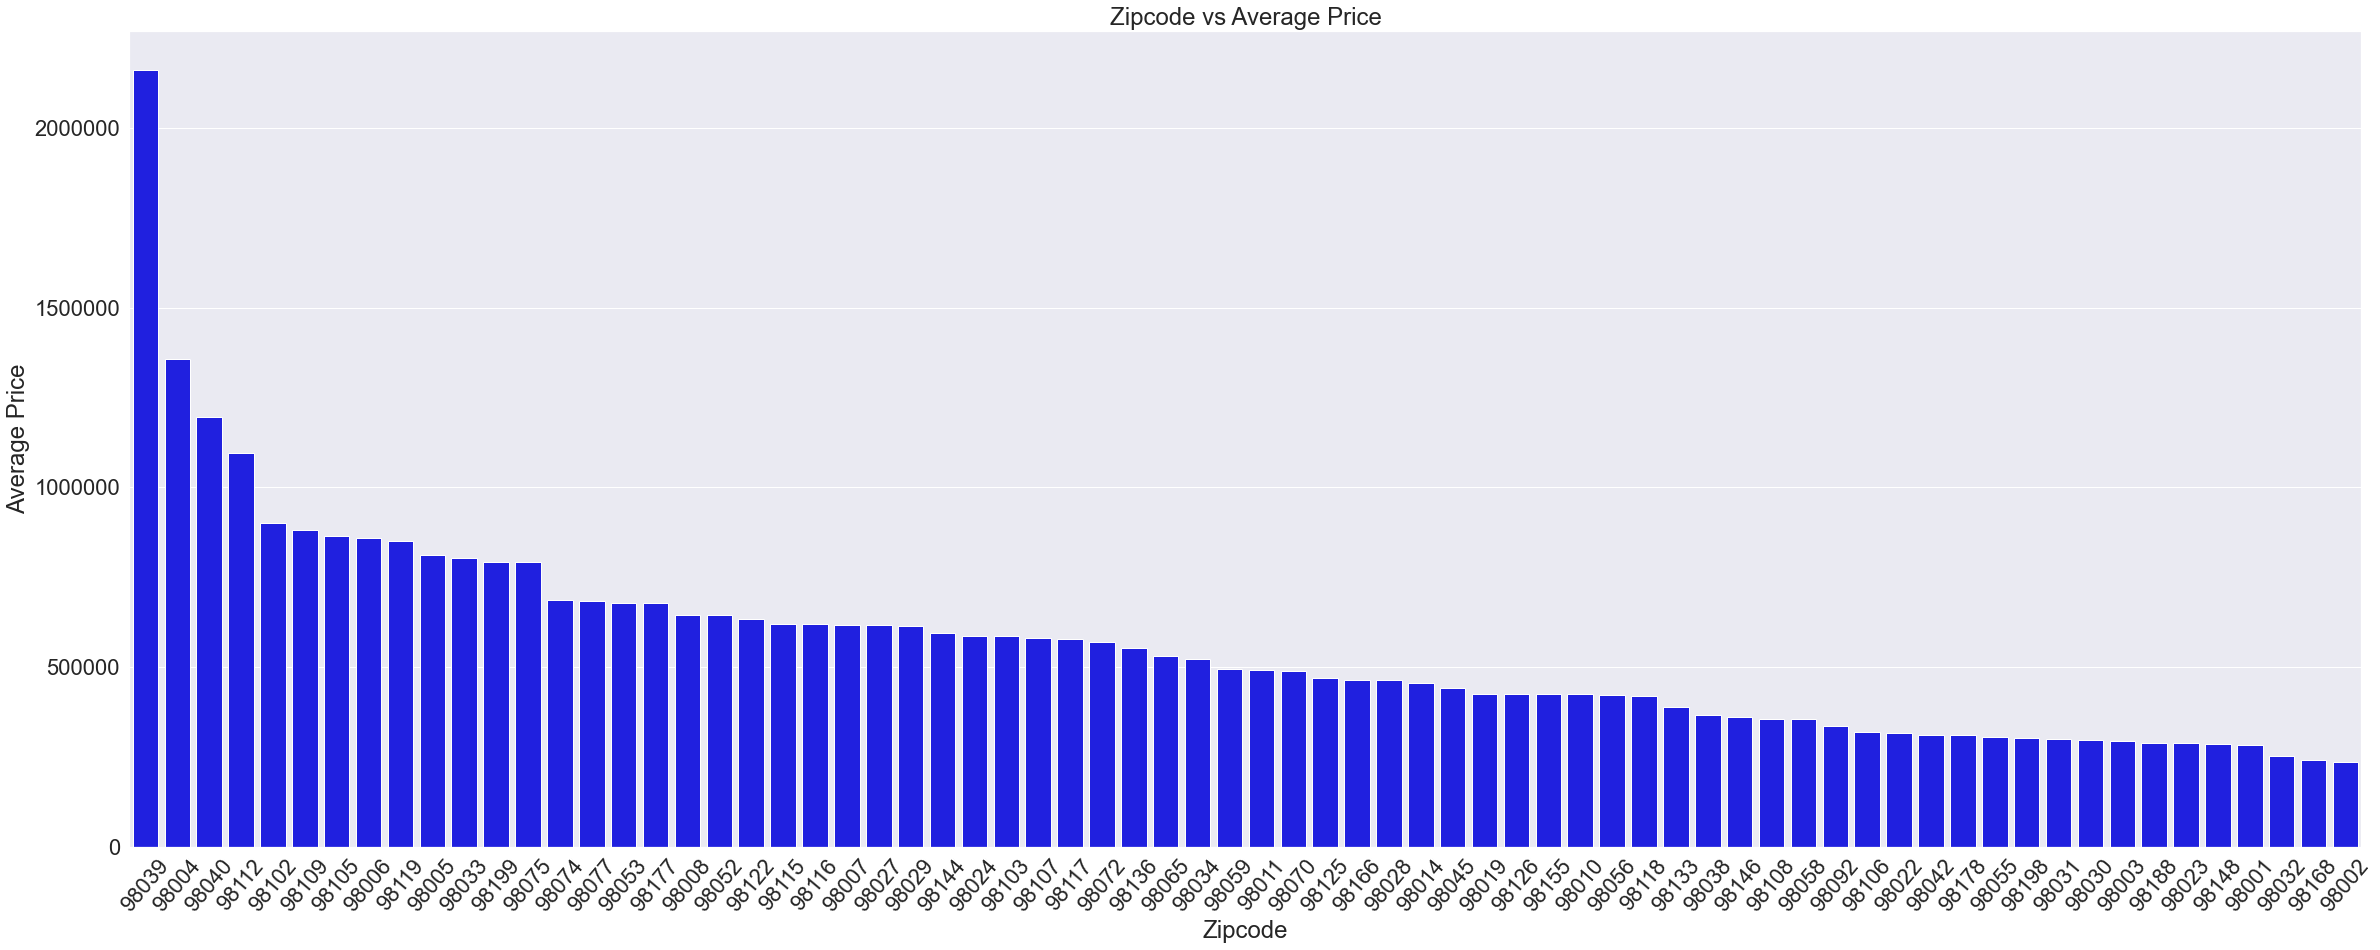

In [224]:
#plotting Zipcode vs Average Price
fig = plt.figure(figsize=(40, 15))
sns.set(font_scale = 2)
sns.barplot(x = 'Zipcode',
            y = 'price',
            data = location_group,
            color = 'blue',
            order = location_group.sort_values('price', ascending = False).Zipcode)

plt.title('Zipcode vs Average Price')
plt.xlabel('Zipcode')
plt.xticks(rotation=50)
plt.ylabel('Average Price')
plt.ticklabel_format(style='plain', axis='y')



In [225]:
#creating waterfront group
waterfront_group = kc_house_data.groupby(by = 'waterfront').mean()

In [226]:
waterfront_group = waterfront_group.rename_axis('waterfront').reset_index()

In [227]:
waterfront_group

,waterfront,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,4581328505.14,532286.22,3.37,2.11,2072.40,15026.10,1.49,0.18,7.65,1783.70,1971.06,80.94,98077.82,47.56,-122.21,1981.88,12689.30
1,1,4454968693.05,1717214.73,3.35,2.71,3244.75,25870.88,1.63,3.72,8.84,2508.76,1962.28,476.63,98096.71,47.54,-122.28,2682.83,22893.70


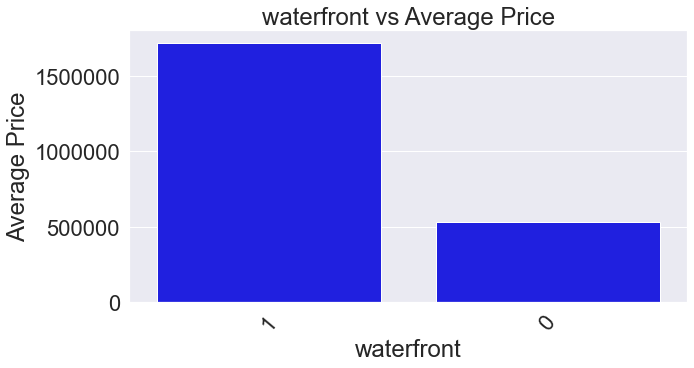

In [228]:
#plotting avg price of homes on waterfront vs not on waterfront
fig = plt.figure(figsize=(10, 5))
sns.set(font_scale = 2)
sns.barplot(x = 'waterfront',
            y = 'price',
            data = waterfront_group,
            color = 'blue',
            order = waterfront_group.sort_values('price', ascending = False).waterfront)

plt.title('waterfront vs Average Price')
plt.xlabel('waterfront')
plt.xticks(rotation=50)
plt.ylabel('Average Price')
plt.ticklabel_format(style='plain', axis='y')

### Comparing size of houses and plots to price

2.) Size vs price

In this section of my notebook I will be comparing how the size of a house and its plot compare to the overall price of a home.  The plan is to first create a scatter plot that compares the square footage of a home to the price and plot a line of regression.  With that we will be able to see if on average homes tend to increase in price with more square footage.

In [ ]:
# looking for any missing values in square footage
kc_house_data[kc_house_data['sqft_living'] == 'NaN']

There are no values of NaN

In [ ]:
kc_house_data[kc_house_data['sqft_living'] == '']

There are no empty values

In [ ]:
# scatter plot home price vs square footage
fig = plt.figure(figsize=(500, 500))
sns.set(font_scale = 1)
sns.lmplot(x = 'sqft_living',
           y = 'price',
           data = kc_house_data,
           line_kws={"color":"r","alpha":0.7,"lw":5})

plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Square footage of living space')
plt.ylabel('Price of home')
plt.title('Price of homes compared to their square footage of living space')

In [ ]:
kc_house_data['sqft_living'].corr(kc_house_data['price'])

you can clearly see there is a positive correlation between the size of a home, and the overall price of a home.

In [ ]:
# scatter plot to determine the relationship between square feet of plot vs price
fig = plt.figure(figsize=(500, 500))
sns.set(font_scale = 1)
sns.lmplot(x = 'sqft_lot',
           y = 'price',
           data = kc_house_data,
           line_kws={"color":"r","alpha":0.7,"lw":5})

plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Square footage of land')
plt.xticks(rotation=50)
plt.ylabel('Price of home')
plt.title('Price of homes compared to their square footage of land')

In [ ]:
kc_house_data['sqft_lot'].corr(kc_house_data['price'])

As we can see here there is a slight positive correlation between square footage of the plot compared to price.
however comparing this to square footage of living space of the house, it would be more beneficial to concentrate on a larger living space rather than the amount of land.

# comparing amount of rooms to price

Here I will be comparing the amount of rooms to overall price. 

In [ ]:
fig = plt.figure(figsize=(500, 500))
sns.set(font_scale = 1)
sns.lmplot(x = 'bedrooms',
           y = 'price',
           data = kc_house_data,
           line_kws={"color":"r","alpha":0.7,"lw":5})

plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Number of bedrooms')
plt.ylabel('Price of home')
plt.title('Price of homes compared to their number of bedrooms')

In [ ]:
kc_house_data['bedrooms'].corr(kc_house_data['price'])

There is a positive correlation between number of rooms and the price of a house.

In [ ]:
fig = plt.figure(figsize=(500, 500))
sns.set(font_scale = 1)
sns.lmplot(x = 'bathrooms',
           y = 'price',
           data = kc_house_data,
           line_kws={"color":"r","alpha":0.7,"lw":5})

plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Number of bathrooms')
plt.ylabel('Price of home')
plt.title('Price of homes compared to their number of bathrooms')

In [ ]:
kc_house_data['bathrooms'].corr(kc_house_data['price'])

### How does the age of a house, condition, and renovations effect the price of a house?

In this section of my notebook i will explore how the age of a house, the condition, and the renovations effect the price of a house.  Since there are too many years to plot the average home price of each year with a bar graph, I will use another scatter plot to show how the year effects the sale price.  The next step will be to look into the overall grade, or quality of the house.  In the above cells i removed the characters that were not numbers, and changed the datatype from object to integer.  To explore this data I will make 2 graphs, the first will show the average sale price for each grade, 1 through 13.  1 being the lowest and 13 being the highest.  

In [ ]:
fig = plt.figure(figsize=(500, 500))
sns.set(font_scale = 1)
sns.lmplot(x = 'yr_built',
           y = 'price',
           data = kc_house_data,
           line_kws={"color":"r","alpha":0.7,"lw":5})

plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Year of construction')
plt.ylabel('Price of home')
plt.title('Price of homes compared to what year they were built')

In [ ]:
#calculating correlation value of the year a house is built to its sale price
kc_house_data['yr_built'].corr(kc_house_data['price'])

As we can see the correlation value is very insignificant when comparing the value of a home to the year built.

In [ ]:
#plotting scatter plot for homes compared to their grade, 1 - 13
fig = plt.figure(figsize=(500, 500))
sns.set(font_scale = 1)
sns.lmplot(x = 'grade',
           y = 'price',
           data = kc_house_data,
           line_kws={"color":"r","alpha":0.7,"lw":5})

plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Overall grade or quality of a home')
plt.ylabel('Price of home')
plt.title('Price of homes compared to their grade')

In [ ]:
#calculating correlation between grade and price
kc_house_data['grade'].corr(kc_house_data['price'])

There is a positive correlation between the grade of house, and the sale price.

The next step is to create a group for each grade, and calculate the average price for each grade.

In [ ]:
#Creating a groupby of 'grade', with the average values of each column
pd.set_option('display.float_format', lambda x: '%.2f' % x)
grade_group = kc_house_data.groupby('grade').mean()

In [ ]:
grade_group

In [ ]:
#resetting index of grade group so grade shows as column not index
grade_group = grade_group.rename_axis('grade').reset_index()

In [ ]:
fig = plt.figure(figsize=(40, 15))
sns.set(font_scale = 2)
sns.barplot(x = 'grade',
            y = 'price',
            data = grade_group,
            color = 'blue',
            order = grade_group.sort_values('price', ascending = False).grade)

plt.title('Grade vs Average Price')
plt.xlabel('Grade')
plt.ylabel('Average Price')
plt.ticklabel_format(style='plain', axis='y')

As expected, the average price of a house with a higher grade is higher than the average cost of a house with a lower grade.

In [ ]:
#filling nan values with 0
kc_house_data['yr_renovated'] = kc_house_data['yr_renovated'].fillna(0)

In [ ]:
#creating a new column with yes or no based off whether yr_renovated has a value higher than 0
kc_house_data['yes_no_renovation'] = np.where(kc_house_data['yr_renovated'] < 1, (0), (1))

In [ ]:
fig = plt.figure(figsize=(30, 15))
sns.set(font_scale = 2)
sns.boxplot(x = 'yes_no_renovation',
            y = 'price',
            data = kc_house_data)
plt.ticklabel_format(style='plain', axis='y')

plt.xlabel('Do these houses have renovations?')
plt.ylabel('Price of house')
plt.title('Houses with renovations vs houses without renovations')

In [ ]:
yes_renovations = kc_house_data.loc[kc_house_data['yes_no_renovation'] == 1]

In [ ]:
yes_renovation_group = yes_renovations.groupby(by = 'zipcode').mean().reset_index()

In [ ]:
no_renovations = kc_house_data.loc[kc_house_data['yes_no_renovation'] == 0]

In [ ]:
no_renovations_group = no_renovations.groupby(by = 'zipcode').mean().reset_index()

In [ ]:
data = [yes_renovation_group, no_renovations_group]

In [ ]:
renovations_df = pd.concat(data)

In [ ]:
renovations_df.sort_values(by = 'zipcode')

In [ ]:
renovations_df.info()

In [ ]:

#plotting average sale price of houses with and without renovations per zip
fig = plt.figure(figsize=(30, 15))
renovation_graph = sns.set(font_scale = 2)
sns.barplot(x = 'zipcode',
            y = 'price',
            hue = 'yes_no_renovation',
            data = renovations_df,
            palette = 'bright')

plt.xlabel('Zipcode')
plt.xticks(rotation=75)
plt.ylabel('Average price')
plt.title('Price of houses in the same zipcode with and without renovations')
plt.legend(title="Renovations")

red_patch = mpatches.Patch(color='orange', label='Renovations completed')
blue_patch = mpatches.Patch(color='blue', label='No renovations completed')

plt.legend(handles=[red_patch, blue_patch])


plt.ticklabel_format(style='plain', axis='y')

In [ ]:
kc_house_data.loc[kc_house_data['zipcode'] == 98102]

###  Model for predicting price from bedrooms, bathrooms, and square footage in a certain area code.

In [ ]:
#setting X equal to columns
X = kc_house_data[['bedrooms','bathrooms','sqft_living']]
#y the target variable is set to price
y = kc_house_data['price']

regr = linear_model.LinearRegression()
regr.fit(X, y)

# Use these inputs to exercise the model
numBeds = 2
numBaths = 3
squareFeet = 2000


predictedPrice = regr.predict([[numBeds,numBaths,squareFeet]])
print(predictedPrice)

In [ ]:
#one observation made is in the zipcode of 98102 more bedrooms seems to make the price of a home go down, where as adding a bathroom or square footage in general raises the price.

### Regression Model

In [ ]:
#create model using y and X and figure out the equation of the line.
ols = linear_model.LinearRegression()
model = sm.OLS(endog = y, exog = X).fit()
response = model.predict(X)


In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))

# Select features for the model
X = kc_house_data[["bedrooms", "bathrooms", "sqft_living"]]

# Select target variable
y = kc_house_data["price"]

# Fit the model
model = linear_model.LinearRegression()
model.fit(X, y)

plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Plot the regression line
sns.regplot(x=predictions, y=y)
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.title("Exploring the correlation between bedrooms, bathrooms, and living space vs price")
plt.show()

In [ ]:
# Select features for the model
X = kc_house_data[["bedrooms", "bathrooms", "sqft_living"]]

# Select target variable
y = kc_house_data["price"]

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Make predictions
predictions = model.predict(X)

# Plot the regression surface
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(kc_house_data["bedrooms"], kc_house_data["bathrooms"], kc_house_data["sqft_living"], c=predictions, cmap=plt.cm.jet, alpha=1)
ax.set_xlabel("Bedrooms", size=15)
ax.set_ylabel("Bathrooms", size=15)
ax.set_zlabel("Sqft Living", size=15)
ax.set_xticklabels(ax.get_xticks(), fontsize=13)
ax.set_yticklabels(ax.get_yticks(), fontsize=13)
ax.set_zticklabels(ax.get_zticks(), fontsize=13)

# Set the tick marks on the x-axis to go up by 1 and label them with the integer values of the tick marks
xticks = range(min(kc_house_data["bedrooms"]), max(kc_house_data["bedrooms"])+1)
ax.set_xticks(xticks)
ax.set_xticklabels(xticks)

# Set the tick marks on the y-axis to go up by 1 and label them with the integer values of the tick marks
yticks = range(min(kc_house_data["bedrooms"]), max(kc_house_data["bedrooms"])+1)
ax.set_yticks(yticks)
ax.set_yticklabels(yticks)

zticks = range(0, kc_house_data["sqft_living"].max()+500, 500)
ax.set_zticks(zticks)
ax.set_zticklabels(zticks, fontsize=11, rotation=30)


zticks = range(0, kc_house_data["sqft_living"].max()+1000, 1000)
ax.set_zticks(zticks[::2])
ax.set_zticklabels(zticks[::2], fontsize=8)



plt.show()

calling OLS regression results

In [ ]:
#calling OLS regression results
formula = 'price ~bedrooms + bathrooms + sqft_living + zipcode + sqft_lot + floors + waterfront + sqft_above + yr_built + yr_renovated + lat + long + sqft_living15 + sqft_lot15 + yes_no_renovation'

model = smf.ols(formula, data=kc_house_data).fit()

print(model.summary())

From looking at these regression results, I can see that none of the variables occured by chance.  I can tell this because Pvalue is 0.000 for everything. (besides intercept/ ask about this)

from looking at my r-squared number, I can tell that given these variables,  with a value of 0.659, my model should be reliable.

## creating heat map based on price with variables being lat/long

In [ ]:
# Create figure with larger size
plt.figure(figsize=(50, 35))

#new variable for price
max_price = 2000000


# Filter the data to only include houses sold for under $2,000,000
filtered_data = kc_house_data[kc_house_data["price"] < max_price]



# Calculate the minimum, maximum, and range of the housing prices
min_price = min(kc_house_data["price"])
max_price = max(kc_house_data["price"])
range_price = max_price - min_price

# Create a scatterplot of the data
plt.scatter(filtered_data["long"], filtered_data["lat"], c=filtered_data["price"], cmap='RdYlGn')

# Add a colorbar to the plot
cbar = plt.colorbar()
cbar.set_label("Price", rotation = 90, size = 50)

# Remove the exponent from the colorbar
cbar.ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=False))

# Set the tick locations and tick labels manually
cbar.set_ticks([min_price, min_price + range_price * 0.25, min_price + range_price * 0.5, min_price + range_price * 0.75, max_price])
cbar.set_ticklabels(['${:,.0f}'.format(min_price), '${:,.0f}'.format(min_price + range_price * 0.25), '${:,.0f}'.format(min_price + range_price * 0.5), '${:,.0f}'.format(min_price + range_price * 0.75), '${:,.0f}'.format(max_price)])

# Set the x axis tick locations
plt.xticks(np.arange(-122.5, -121.5 + 0.1, 0.1), rotation = 50, size = 30)

# Set the y axis tick locations
plt.yticks(np.arange(47.2, 47.8 + 0.1, 0.1), rotation = 30, size = 30)

# Add a title to the plot
plt.title('Real Estate Prices in Kings County by Location', size = 75)

# Add x and y axis labels
plt.xlabel('Longitude', size = 50)
plt.ylabel('Latitude', size = 50 )

# Show the plot
plt.show()

The above heat map shows me that a good spot to look for homes to buy for resale is between latitude of 47.6 and 47.7.
As for longitude it tells me that the most desirable spot is between 122.1 and 122.3
this is the visualization for my FIRST question.

In [ ]:
# Create pair plot
sns.pairplot(kc_house_data, vars=['bedrooms', 'bathrooms', 'sqft_living', 'price'], hue='yes_no_renovation')
plt.figure(figsize=(16, 12))

# Show plot
plt.show()

The pair plot above has a lot of useful info, it helps me with my second AND third questions provided at the start of this notebook.

In regards to the second question, its quite clear that square foot living space is the most influential factor of price between the 3 variable i chose to investigate here